# Percolation last

## Percolation by AllD

In [1]:
%matplotlib inline
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from IPython.display import display
import matplotlib
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

p = 0.00004
number_of_nodes = 100000
seed = 1
G = G = nx.read_gpickle('erdos_p_{}_nodes_{}_seed_{}.gpkl'.format(p, number_of_nodes, seed))
number_of_nodes = G.number_of_nodes()
#df = pd.DataFrame(pickle.load(open('data/percolation2d_last2.pkl', 'rb')))
df = pd.DataFrame(pickle.load(open('data/percolation2d_last_maxr.pkl', 'rb')))
df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['Fraction of AllD'] = df['AllD'] / number_of_nodes

#df = df.rename(columns={'Defections': 'RDC'})

display(df.head())
sns.set_palette('colorblind')
sns.set_style("ticks")
sns.set_context("paper")
linewidthin = 3.68153
textwidthin = 7.50146

display(df[df['AllD']==1].pivot_table(index='Projection', columns='Paranoia', values='seed', aggfunc=len,
                                     margins=True))



AllD  Cooperations       RDC                 Parameters  Paranoia   Prior  \
0     1      0.999910  0.000090  Beta(9, 3), Paranoia 0.22   0.22109  (9, 3)   
1   101      0.985566  0.014434  Beta(9, 3), Paranoia 0.22   0.22109  (9, 3)   
2   201      0.972351  0.027649  Beta(9, 3), Paranoia 0.22   0.22109  (9, 3)   
3   301      0.957424  0.042576  Beta(9, 3), Paranoia 0.22   0.22109  (9, 3)   
4   401      0.944360  0.055640  Beta(9, 3), Paranoia 0.22   0.22109  (9, 3)   

   Projection  Time  seed  Fraction of AllD  
0         0.5  1999    43          0.000010  
1         0.5  1999    43          0.001031  
2         0.5  1999    43          0.002052  
3         0.5  1999    43          0.003073  
4         0.5  1999    43          0.004093

Paranoia      0.0  0.221090256704  0.355534924738  0.372434210617     All
Projection                                                               
0.0         100.0           100.0           100.0           100.0   400.0
0.25        100.0           100.0           100.0           100.0   400.0
0.5         100.0           100.0           100.0           100.0   400.0
0.75        100.0           100.0           100.0           100.0   400.0
All         400.0           400.0           400.0           400.0  1600.0

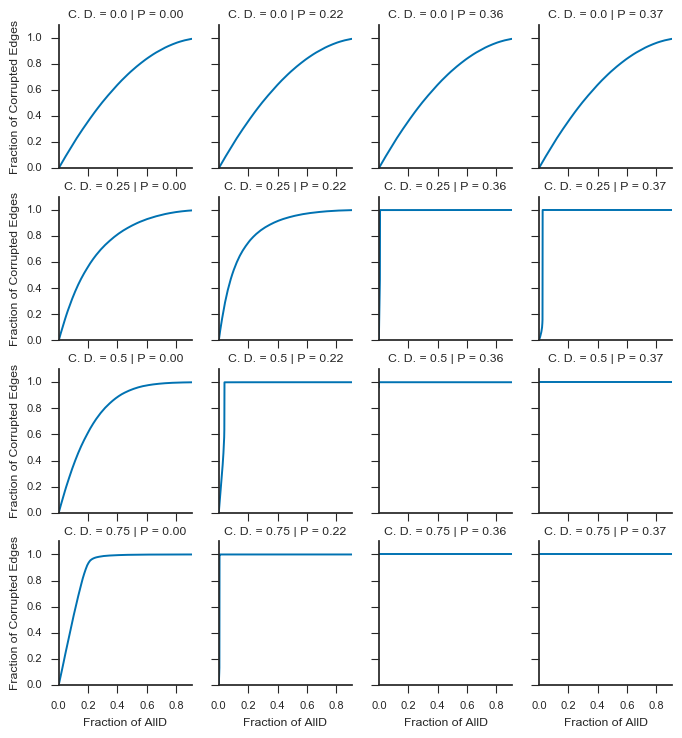

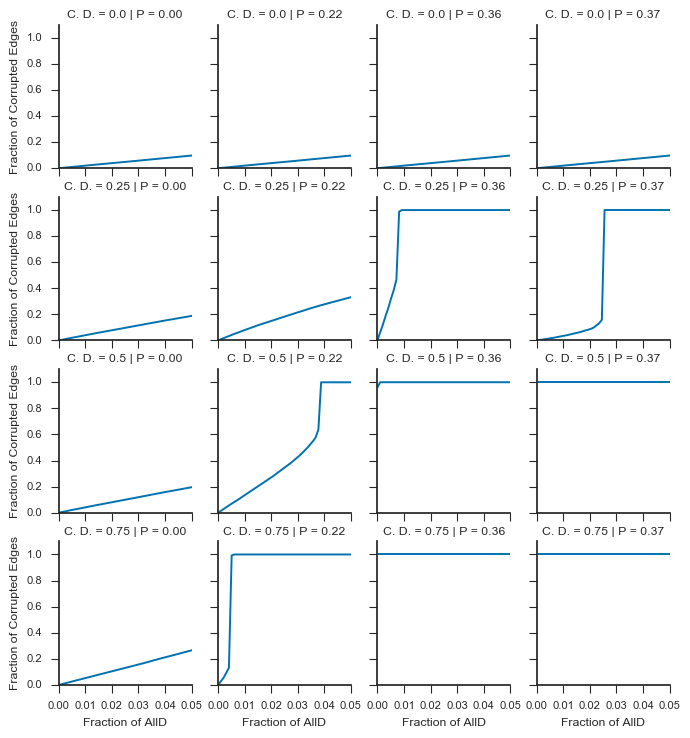

In [2]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='Fraction of AllD', unit='seed', value='RDC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('Fraction of AllD', 'Fraction of Corrupted Edges')
g.set_titles("C. D. = {row_name} | P = {col_name:.2f}")
plt.savefig('figures/alld_percolation.pdf')

g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 0.05), ylim=(0, 1.1), despine=True, 
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='Fraction of AllD', unit='seed', value='RDC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('Fraction of AllD', 'Fraction of Corrupted Edges')
g.axes[0,0].set_xlim([0, 0.05])
g.axes[0,0].set_ylim([0, 1.1])
g.set_titles("C. D. = {row_name} | P = {col_name:.2f}")



(0.91800000000000015, 0.19999999999999996, 0.010000000000000009, 0.67335798631199784)


/home/andres/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


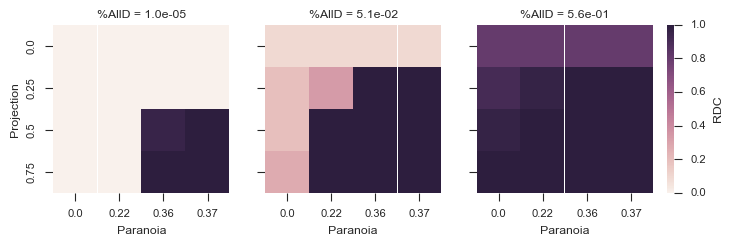

In [3]:
%matplotlib inline
space=.2
def pivot_table_heatmap(data=None, index=None, columns=None, values=None, aggfunc=np.mean, *args, **kwargs):
    df = pd.pivot_table(data, index=index, columns=columns, values=values, aggfunc=aggfunc)
    xl = ['{:.2}'.format(x) for x in df.columns]
    out = sns.heatmap(df, xticklabels=xl, *args, **kwargs)
    return out
g = sns.FacetGrid(df, col='Fraction of AllD', col_order=sorted(df['Fraction of AllD'].unique())[:101:50],
                  despine=True, size=(textwidthin)/3, aspect=1)
pos = g.facet_axis(0, -1).get_position().bounds
cbar_ax = g.fig.add_axes([pos[0]+pos[2], pos[1], .01, pos[3]]) 
g.map_dataframe(pivot_table_heatmap, index='Projection', columns='Paranoia',
                values='RDC', vmin=0, vmax=1, cbar_ax=cbar_ax,
                linewidths=.001, cbar_kws={'label': 'RDC'})
g.set_titles("%AllD = {col_name:.1e}")
g.fig.subplots_adjust(wspace=space, right=.9, left=0.1, bottom=0.2)
g.fig.subplots_adjust()
fgpos = g.facet_axis(0, -1).get_position().bounds
cbpos = list(cbar_ax.get_position().bounds)
cbpos[0] = fgpos[0] + fgpos[2] + 0.018
cbpos[1]= fgpos[1]
cbpos[3] = fgpos[3]
cbar_ax.set_position(cbpos)
print(cbar_ax.get_position().bounds)
g.set_axis_labels('Paranoia', 'Projection')
plt.show()

# System Stability

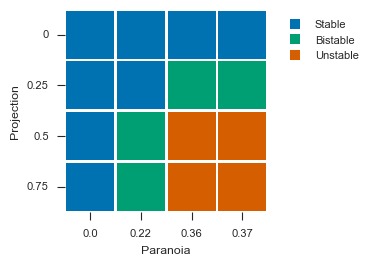

In [5]:
pv = df.pivot_table(index='Projection', columns='Paranoia', values='RDC')

for (proyection, paranoia), subdf in df.groupby(['Projection', 'Paranoia']):
    pepe = subdf.groupby('Fraction of AllD').mean()['RDC']#.diff()>0.2)#.idxmax()
    pepe = pepe.to_frame(name='mean')
    pepe['diff'] = pepe['mean'].diff()
    pepe['criteria'] = pepe['diff'] > 0.2
    if not pepe['criteria'].any():
        if pepe.loc[pepe.index[0], 'mean'] > 0.2:
            pepe.loc[pepe.index[0], 'criteria'] = True
        else:
            pepe.loc[pepe.index[-1], 'criteria'] = True
    pv.loc[proyection, paranoia] = pepe['criteria'].idxmax()
pv[pv==pv.iloc[0, 0]] = 'Stable'
pv[pv==pv.iloc[3, 3]] = 'Unstable'
pv[(pv>0) & (pv<1)] = 'Bistable'

pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 3.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')
for sname in ['Stable', 'Bistable', 'Unstable']:
    sgr = grouped.get_group(sname)
    ax.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=35)
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend(loc=1, markerscale=0.2, bbox_to_anchor=(1.5, 1))
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.22, 0.36, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');
sns.despine(left=True, bottom=True)
plt.savefig('figures/stablemap.pdf')

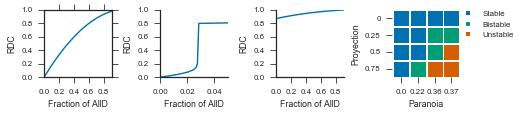

In [9]:
aspect = 0.95
lpad = .1
hpad = 0.015
w = 0.2 + hpad
frac = 0.5
fig = plt.figure(figsize=(textwidthin, textwidthin*0.25*aspect))
ax1 = fig.add_axes([lpad, 0.35, frac/4, frac/aspect])
ax2 = fig.add_axes([w+lpad, 0.35, frac/4, frac/aspect])
ax3 = fig.add_axes([2*w + lpad, 0.35, frac/4, frac/aspect])
ax4 = fig.add_axes([3*w + lpad, 0.35, frac/4, frac/aspect])

for sname in ['Stable', 'Bistable', 'Unstable']:
    sgr = grouped.get_group(sname)
    ax4.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=15)
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend(loc=1, markerscale=0.3, bbox_to_anchor=(1.9, 1.1))
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.22, 0.36, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Proyection');
sns.despine(left=True, bottom=True, ax=ax4)
sns.despine(ax=ax2)
sns.despine(ax=ax3)
sns.tsplot(df[(df['Projection']==0.0) & (df['Paranoia']==0)], time='Fraction of AllD', value='RDC', unit='seed', ax=ax1)
sns.tsplot(df[(df['Projection']==0.25) & (df['Paranoia']==df['Paranoia'].max())], time='Fraction of AllD', value='RDC', unit='seed', ax=ax2)
sns.tsplot(df[(df['Projection']==0.5) & (df['Paranoia']==df['Paranoia'].max())], time='Fraction of AllD', value='RDC', unit='seed', ax=ax3)
ax2.set_xlim([0, 0.05])
ax2.set_xticks([0, 0.02, 0.04])
ax3.set_ylim([0, 1])
plt.savefig('figures/stablemap_examples.pdf')

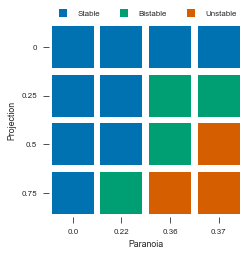

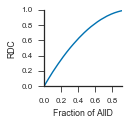

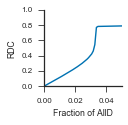

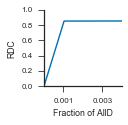

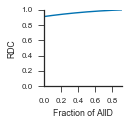

In [10]:
aspect = 0.8
lpad = .1
hpad = 0.015
w = 0.2 + hpad
frac = 0.72
fig = plt.figure(figsize=(textwidthin/2, textwidthin/2))
ax = fig.add_axes([0.15, 0.15, frac, frac])

for sname in ['Stable', 'Bistable', 'Unstable']:
    sgr = grouped.get_group(sname)
    ax.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=42)
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.22, 0.36, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');
sns.despine(left=True, bottom=True, ax=ax)
plt.savefig('figures/stablemap_sub1.pdf')

par = sorted(np.unique(df['Paranoia']))[2]
fig, ax = plt.subplots(1, figsize=(textwidthin/4, textwidthin/4))
sns.tsplot(df[(df['Projection']==0.0) & (df['Paranoia']==par)], time='Fraction of AllD', value='RDC', unit='seed', ax=ax)
sns.despine(ax=ax)
plt.tight_layout()
plt.savefig('figures/stablemap_sub2.pdf')

fig, ax = plt.subplots(1, figsize=(textwidthin/4, textwidthin/4))
sns.tsplot(df[(df['Projection']==0.25) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax, marker='')
sns.despine(ax=ax)
ax.set_xlim([0, 0.05])
ax.set_xticks([0, 0.02, 0.04])
plt.tight_layout()
plt.savefig('figures/stablemap_sub3.pdf')

fig, ax = plt.subplots(1, figsize=(textwidthin/4, textwidthin/4))
sns.tsplot(df[(df['Projection']==0.5) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax, marker='')
sns.despine(ax=ax)
ax.set_xlim([0, 0.004])
ax.set_xticks([0.001, 0.003])
plt.tight_layout()
plt.savefig('figures/stablemap_sub4.pdf')


fig, ax = plt.subplots(1, figsize=(textwidthin/4, textwidthin/4))
sns.tsplot(df[(df['Projection']==0.75) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax)
sns.despine(ax=ax)
ax.set_ylim([0, 1])
plt.tight_layout()
plt.savefig('figures/stablemap_sub5.pdf')

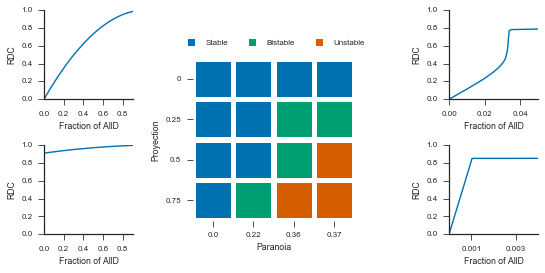

In [11]:
pad = 0.1
fig = plt.figure(figsize=(textwidthin, textwidthin/2))
ax0 = fig.add_axes([0.25+pad, 2*pad, 0.5-2*pad, 1-4*pad])

for sname in ['Stable', 'Bistable', 'Unstable']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=35)
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.22, 0.36, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Proyection');
sns.despine(left=True, bottom=True, ax=ax0)

par = sorted(np.unique(df['Paranoia']))[2]
pad = 0.075
ad = 0.01
ax1 = fig.add_axes([pad, 0.5+2*pad, 0.25-pad-ad, 0.5-2*pad-2*ad])
sns.tsplot(df[(df['Projection']==0.0) & (df['Paranoia']==par)], time='Fraction of AllD', value='RDC',
           unit='seed', ax=ax1)
sns.despine(ax=ax1)

ax2 = fig.add_axes([pad, 2*pad, 0.25-pad-ad, 0.5-2*pad-2*ad])
sns.tsplot(df[(df['Projection']==0.75) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax2)
sns.despine(ax=ax2)
ax2.set_ylim([0, 1])

ax3 = fig.add_axes([0.75+pad, 0.5+2*pad, 0.25-pad-ad, 0.5-2*pad-2*ad])
sns.tsplot(df[(df['Projection']==0.25) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax3, marker='')
sns.despine(ax=ax3)
ax3.set_xlim([0, 0.05])
ax3.set_xticks([0, 0.02, 0.04])


ax4 = fig.add_axes([0.75+pad, 2*pad, 0.25-pad-ad, 0.5-2*pad-2*ad])
sns.tsplot(df[(df['Projection']==0.5) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax4, marker='')
sns.despine(ax=ax4)
ax4.set_xlim([0, 0.004])
ax4.set_xticks([0.001, 0.003])

plt.savefig('figures/stablemap3.pdf')

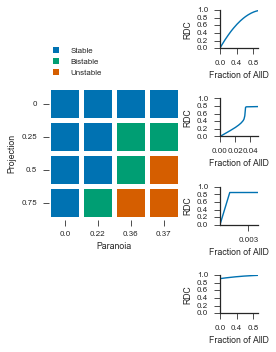

In [12]:
pad = 0.17
aspect = 4./3
fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
ax0 = fig.add_axes([pad, 0.25+pad/aspect, 2./3-pad, 0.5-pad/aspect])
for sname in ['Stable', 'Bistable', 'Unstable']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=28)
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.2, 1.2), ncol=1)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.22, 0.36, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');
sns.despine(left=True, bottom=True, ax=ax0)

par = sorted(np.unique(df['Paranoia']))[2]
pad = 0.15
ad = 0.04
ax1 = fig.add_axes([2./3+pad, 0.75+pad/aspect, 1./3-pad-ad, 0.25-(pad+ad)/aspect])
sns.tsplot(df[(df['Projection']==0.0) & (df['Paranoia']==par)], time='Fraction of AllD', value='RDC',
           unit='seed', ax=ax1)
sns.despine(ax=ax1)
ax1.set_xticks([0, 0.4, 0.8])

ax2 = fig.add_axes([2./3+pad, 0.5+pad/aspect, 1./3-pad-ad, 0.25-(pad+ad)/aspect])
sns.tsplot(df[(df['Projection']==0.25) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax2, marker='')
sns.despine(ax=ax2)
ax2.set_xlim([0, 0.05])
ax2.set_xticks([0, 0.02, 0.04])

ax3 = fig.add_axes([2./3+pad, 0.25+pad/aspect, 1./3-pad-ad, 0.25-(pad+ad)/aspect])
sns.tsplot(df[(df['Projection']==0.5) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax3, marker='')
sns.despine(ax=ax3)
ax3.set_xlim([0, 0.004])
ax3.set_xticks([0.003])

ax4 = fig.add_axes([2./3+pad, pad/aspect, 1./3-pad-ad, 0.25-(pad+ad)/aspect])
sns.tsplot(df[(df['Projection']==0.75) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax4)
sns.despine(ax=ax4)
ax4.set_ylim([0, 1])
ax4.set_xticks([0, 0.4, 0.8])
plt.savefig('figures/stabilitymap4.pdf')

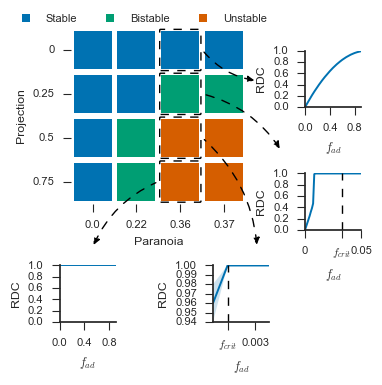

In [6]:
import matplotlib.patches as mpatches
pad = 0.17
ad = 0.02
aspect = 1
fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
ax0 = fig.add_axes([pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect])
for sname in ['Stable', 'Bistable', 'Unstable']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=28)
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.4, 1.05), ncol=3)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.22, 0.36, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([2.05, 0.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([2.05, 1.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([2.05, 2.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([2.05, 3.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)

ax0.annotate("", (3, 3.5), (4.25, 2.8),arrowprops=dict(arrowstyle='<|-', fc="k", ec="k",
                                                       connectionstyle="arc3,rad=-0.2",linewidth=1,
                                                       linestyle='--'))
ax0.annotate("", (3, 2.5), (4.8, 1.2),arrowprops=dict(arrowstyle='<|-', fc="k", ec="k",
                                                       connectionstyle="arc3,rad=0.2",linewidth=1,
                                                       linestyle='--'))
ax0.annotate("", (3, 1.5), (4.25, -1),arrowprops=dict(arrowstyle='<|-', fc="k", ec="k",
                                                       connectionstyle="arc3,rad=0.2",linewidth=1,
                                                       linestyle='--'))
ax0.annotate("", (2, 0.5), (0.5, -1),arrowprops=dict(arrowstyle='<|-', fc="k", ec="k",
                                                       connectionstyle="arc3,rad=-0.2",linewidth=1,
                                                       linestyle='--'))

sns.despine(left=True, bottom=True, ax=ax0)

par = sorted(np.unique(df['Paranoia']))[2]
pad = 0.14
ad = 0.04
ax1 = fig.add_axes([8./12+pad, 7./12+pad/aspect, 1./3-pad-ad, 1./3-(pad+ad)/aspect])
sns.tsplot(df[(df['Projection']==0.0) & (df['Paranoia']==par)], time='Fraction of AllD', value='RDC',
           unit='seed', ax=ax1)
sns.despine(ax=ax1)
ax1.set_xticks([0, 0.4, 0.8])
ax1.set_xlabel(r'$f_{ad}$')

ax2 = fig.add_axes([8./12+pad, 3./12+pad/aspect, 1./3-pad-ad, 1./3-(pad+ad)/aspect])
sns.tsplot(df[(df['Projection']==0.25) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax2, marker='')
sns.despine(ax=ax2)
ax2.set_xlim([0, 0.05])
ax2.set_xticks([0, 0.032675, 0.05])
ax2.set_xticklabels([0, '$f_{crit}$', 0.05])
ax2.set_xlabel(r'$f_{ad}$')
ax2.axvline(0.032675, linestyle='--', color='k', linewidth=1)
ax3 = fig.add_axes([5./12+pad, pad/aspect, 1./3-pad-ad, 1./3-(pad+ad)/aspect])
sns.tsplot(df[(df['Projection']==0.5) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax3, marker='')
sns.despine(ax=ax3)
ax3.set_xlim([0, 0.004])
#ax3.set_xticks([0.003])
ax3.set_xlabel(r'$f_{ad}$')
ax3.set_xticks([0.001031, 0.003])
ax3.set_xticklabels(['$f_{crit}$', 0.003])
ax3.axvline(0.001031, linestyle='--', color='k', linewidth=1)

ax4 = fig.add_axes([pad, pad/aspect, 1./3-pad-ad, 1./3-(pad+ad)/aspect])
sns.tsplot(df[(df['Projection']==0.75) & (df['Paranoia']==par)], time='Fraction of AllD',
           value='RDC', unit='seed', ax=ax4)
sns.despine(ax=ax4)
ax4.set_ylim([0, 1])
ax4.set_xticks([0, 0.4, 0.8])
ax4.set_xlabel(r'$f_{ad}$')

plt.savefig('figures/stabilitymap5.pdf')